In [1]:
import pickle
from transformers import AutoModel
from typing import List, Tuple
import matplotlib.pyplot as plt

/Users/garylai/Dev/subset-active-learning/.venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def get_test_accs(path_prefix: str, sampling_sizes: Tuple[int]) -> List[float]:
    test_set_results = []
    for training_size in sampling_sizes: 
        with open(f"{path_prefix}{training_size}.pkl", "rb") as f:
            test_set_result = pickle.load(f)
            test_set_results.append(test_set_result)

    get_accs = lambda x: x.metrics["test_accuracy"]
    test_accs = list(map(get_accs, test_set_results))
    return test_accs

def plot_result_comparison(results: Tuple[List[float]], legend: List[str]) -> None:
    result_lengths = map(len, results)
    if len(set(result_lengths)) != 1: 
        raise ValueError(f"The results to be compared don't have the same length. Got {result_lengths}")
    for result in results: 
        plt.plot(result)
    plt.legend(legend)
    x = range(len(result))
    plt.xticks(x, [(i+1)*1000 for i in x], rotation='vertical')
    plt.xlabel("Training Size")
    plt.ylabel("Test Accuracy")
    plt.title(f"Test Accuracy vs Training Size")
    plt.show()
    plt.show()

In [3]:
MODEL_TRAINING_STEPS = "20k"
SAMPLING_SIZES = (1000, 2000, 3000, 4000)

random_resampling_results = get_test_accs(path_prefix=f"./results/random_sampling_test/{MODEL_TRAINING_STEPS}_steps_corrected/test_set_evaluation_", sampling_sizes=SAMPLING_SIZES)
uncertainty_sampling_results = get_test_accs(path_prefix=f"./results/uncertainty_sampling_test/{MODEL_TRAINING_STEPS}_steps_corrected/test_set_evaluation_", sampling_sizes=SAMPLING_SIZES)
# there are only 20k results for subset sampling
subset_sampling_results = get_test_accs(path_prefix=f"./results/subset_sampling_test/20k_steps_corrected/test_set_evaluation_", sampling_sizes=SAMPLING_SIZES)

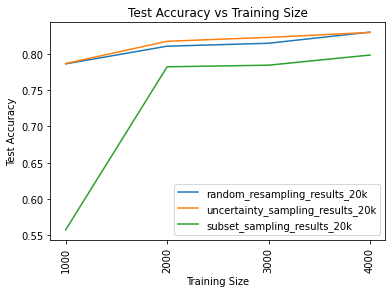

In [4]:
plot_result_comparison((random_resampling_results, uncertainty_sampling_results, subset_sampling_results), legend=["random_resampling_results_20k", "uncertainty_sampling_results_20k", "subset_sampling_results_20k"])

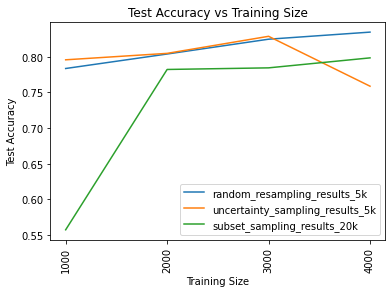

In [5]:
MODEL_TRAINING_STEPS = "5k"
SAMPLING_SIZES = (1000, 2000, 3000, 4000)

random_resampling_results = get_test_accs(path_prefix=f"./results/random_sampling_test/{MODEL_TRAINING_STEPS}_steps_corrected/test_set_evaluation_", sampling_sizes=SAMPLING_SIZES)
uncertainty_sampling_results = get_test_accs(path_prefix=f"./results/uncertainty_sampling_test/{MODEL_TRAINING_STEPS}_steps_corrected/test_set_evaluation_", sampling_sizes=SAMPLING_SIZES)

plot_result_comparison((random_resampling_results, uncertainty_sampling_results, subset_sampling_results), legend=["random_resampling_results_5k", "uncertainty_sampling_results_5k", "subset_sampling_results_20k"])

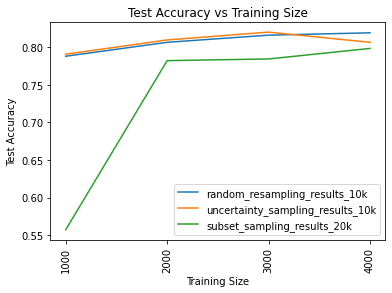

In [6]:
MODEL_TRAINING_STEPS = "10k"
SAMPLING_SIZES = (1000, 2000, 3000, 4000)

random_resampling_results = get_test_accs(path_prefix=f"./results/random_sampling_test/{MODEL_TRAINING_STEPS}_steps_corrected/test_set_evaluation_", sampling_sizes=SAMPLING_SIZES)
uncertainty_sampling_results = get_test_accs(path_prefix=f"./results/uncertainty_sampling_test/{MODEL_TRAINING_STEPS}_steps_corrected/test_set_evaluation_", sampling_sizes=SAMPLING_SIZES)
# there are only 20k results for subset sampling
subset_sampling_results = get_test_accs(path_prefix=f"./results/subset_sampling_test/20k_steps_corrected/test_set_evaluation_", sampling_sizes=SAMPLING_SIZES)


plot_result_comparison((random_resampling_results, uncertainty_sampling_results, subset_sampling_results), legend=["random_resampling_results_10k", "uncertainty_sampling_results_10k", "subset_sampling_results_20k"])